In [1]:
import pandas as pd
df = pd.read_csv('customer_offers.csv').set_index('customer_name')

In [2]:
from sklearn import model_selection

X_train, X_test = model_selection.train_test_split(df, random_state = 100)

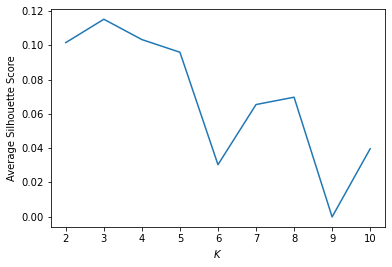

In [3]:
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

krange = list(range(2,11))
avg_silhouettes = []
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=100)
    model.fit(X_train)
    cluster_assignments = model.predict(X_test)
    
    silhouette_avg = metrics.silhouette_score(X_test, cluster_assignments)
    avg_silhouettes.append(silhouette_avg)
    
plt.plot(krange, avg_silhouettes)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")
plt.show()

In [4]:
model = cluster.KMeans(n_clusters=3, random_state=100)
model.fit(X_train)

km_labels = model.predict(X_test)
km_silhouette = metrics.silhouette_score(X_test, km_labels)

print('k-means silhouette score: ' + str(km_silhouette))

k-means silhouette score: 0.115298516478898


In [5]:
bandwidth = cluster.estimate_bandwidth(X_train, quantile=0.1, n_samples=500)
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(X_train)

ms_labels = ms.predict(X_test)

ms_silhouette = metrics.silhouette_score(X_test, ms_labels)
print('mean-shift silhouette score: ' + str(ms_silhouette))

mean-shift silhouette score: 0.07308587709358311


In [6]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=4)
km.fit(X_train)

kmode_labels = km.predict(X_test)

kmode_silhouette = metrics.silhouette_score(X_test, kmode_labels)

print('k-mode silhouette score: ' + str(kmode_silhouette))

k-mode silhouette score: 0.11750917239635501
